# Gas prices Assessment 
## Ricardo Letona 
#### This problem is about making simple plots with the programming language of your choice and telling stories using those plots. For this exercise, you’ll use the GasPrices.csv data set, which contains data from 101 gas stations collected in 2016.


### Install the libraries to work with dataframes

In [124]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.3/8.3 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Install the libraries to generate the plots

In [18]:
!pip install matplotlib
!pip install matplotlib.pyplot
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import libraries and load the dataframe

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('Gasprices.csv')
df.head()

,Unnamed: 0,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
2,3,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
3,4,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
4,5,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


### Variables
#### ID: Order in which gas stations were visited
#### Name: Name of gas station
#### Price: Price of regular unleaded gasoline, gathered on Sunday, April 3rd, 2016
#### Highway: Is the gas station accessible from either a highway or a highway access road?
#### Stoplight: Is there a stoplight in front of the gas station?
#### Competitors: Are there any other gas stations in sight?
#### Zipcode: ZIP code in which gas station is located
#### Income: Median Household Income of the ZIP code where the gas station is located based on 2014 data from the U.S. Census Bureau
#### Brand: ExxonMobil, ChevronTexaco, Shell, or Other

### The theories
#### People have a lot of theories about what explains the variation in prices between gas stations. Here are several such theories below. Which of these theories seem plausible, and which are unsupported by data?

### 1. Gas stations charge more if they lack direct competition in sight (boxplot).

<function matplotlib.pyplot.show(close=None, block=None)>

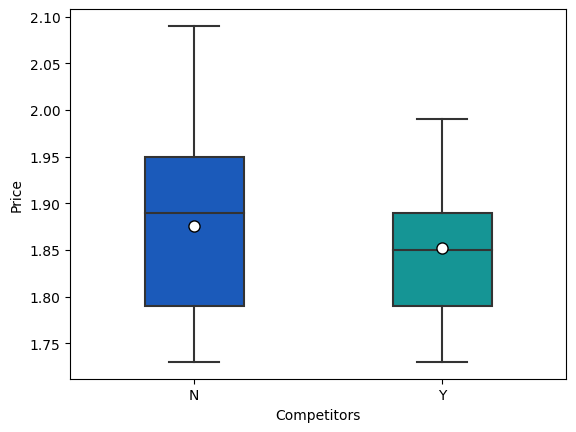

In [44]:
sns.boxplot(x= "Competitors", y= "Price", data= df, width=0.4, showmeans=True, meanprops= {"marker":"o"
                                                                                          , "markerfacecolor":"white"
                                                                                          , "markersize": "8"
                                                                                          , "markeredgecolor": "black"}
            ,palette= "winter")
plt.show

### Convert the variable Competitors to a numerical variable using a dummy variable

In [5]:
df_competition = pd.get_dummies(df['Competitors'], dtype=int)
df_competition = pd.concat([df, df_competition], axis = 1)
df_competition.drop(df_competition.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
df_competition

,ID,Price,Y
0,1,1.79,0
1,2,1.83,0
2,3,1.88,1
3,4,1.88,1
4,5,1.84,0
...,...,...,...
96,97,1.77,0
97,98,1.99,1
98,99,1.99,1
99,100,1.99,1


### Create the model

In [6]:
lm_comp = LinearRegression()
lm_comp
X_comp = df_competition[['Y']]
Y_comp = df_competition['Price']
lm_comp.fit(X_comp,Y_comp)
Yhat_comp=lm_comp.predict(X_comp)

In [7]:
c_comp = lm_comp.intercept_
c_comp

1.8758823529411766

In [8]:
m_comp = lm_comp.coef_
m_comp

array([-0.02348235])

In [9]:
y_pred_comp = lm_comp.predict(X_comp)
y_pred_comp

array([1.87588235, 1.87588235, 1.8524    , 1.8524    , 1.87588235,
       1.8524    , 1.8524    , 1.87588235, 1.87588235, 1.87588235,
       1.87588235, 1.87588235, 1.87588235, 1.87588235, 1.87588235,
       1.8524    , 1.8524    , 1.8524    , 1.8524    , 1.8524    ,
       1.8524    , 1.8524    , 1.8524    , 1.87588235, 1.87588235,
       1.8524    , 1.8524    , 1.87588235, 1.87588235, 1.87588235,
       1.8524    , 1.8524    , 1.8524    , 1.8524    , 1.87588235,
       1.8524    , 1.8524    , 1.8524    , 1.8524    , 1.8524    ,
       1.8524    , 1.8524    , 1.8524    , 1.87588235, 1.8524    ,
       1.8524    , 1.87588235, 1.87588235, 1.8524    , 1.8524    ,
       1.87588235, 1.8524    , 1.8524    , 1.87588235, 1.87588235,
       1.8524    , 1.8524    , 1.8524    , 1.8524    , 1.8524    ,
       1.8524    , 1.87588235, 1.8524    , 1.8524    , 1.87588235,
       1.87588235, 1.87588235, 1.87588235, 1.87588235, 1.87588235,
       1.87588235, 1.8524    , 1.8524    , 1.87588235, 1.8524 

### Calculate Elasticity

In [10]:
comp_e = m_comp *X_comp.mean()/y_pred_comp.mean()
comp_e

Y   -0.006236
dtype: float64

In [127]:
r2_comp = r2_score(Y_comp, y_pred_comp)
r2_comp

0.020952078098767868

### 2.The richer the area, the higher the gas price (scatter plot). 

<Axes: xlabel='Income', ylabel='Price'>

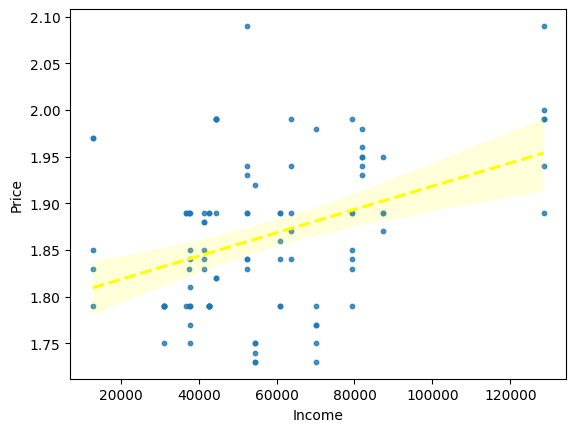

In [40]:
sns.regplot(data= df,x= "Income", y="Price", line_kws=dict(color='yellow', linestyle='--')
           ,scatter_kws=dict(s=10))
plt.show

### Create the model

In [16]:
lm_income = LinearRegression()
lm_income
X_income = df[['Income']]
Y_income = df['Price']
lm_income.fit(X_income,Y_income)
Yhat_income=lm_income.predict(X_income)

In [17]:
c_income = lm_income.intercept_
c_income

1.7934424994161258

In [18]:
m_income = lm_income.coef_
m_income*10000

array([0.01248341])

In [21]:
y_pred_income = lm_income.predict(X_income)
y_pred_income

array([1.80940379, 1.80940379, 1.84497278, 1.84497278, 1.84497278,
       1.84012547, 1.84012547, 1.84012547, 1.84012547, 1.84497278,
       1.80940379, 1.80940379, 1.80940379, 1.90243018, 1.84049248,
       1.86150955, 1.86150955, 1.84664056, 1.84664056, 1.86150955,
       1.86150955, 1.84049248, 1.84049248, 1.83925413, 1.84049248,
       1.83925413, 1.83925413, 1.84664056, 1.84664056, 1.84664056,
       1.84664056, 1.84664056, 1.84664056, 1.84497278, 1.86150955,
       1.86150955, 1.84497278, 1.90243018, 1.90243018, 1.90243018,
       1.84049248, 1.84049248, 1.84049248, 1.84049248, 1.83238076,
       1.83238076, 1.83238076, 1.83238076, 1.83238076, 1.83238076,
       1.85873824, 1.84896373, 1.84896373, 1.84896373, 1.84896373,
       1.86941155, 1.86941155, 1.86941155, 1.86941155, 1.86941155,
       1.86941155, 1.87302425, 1.89245469, 1.89245469, 1.89245469,
       1.95392426, 1.95392426, 1.95392426, 1.95392426, 1.95392426,
       1.95392426, 1.85873824, 1.85873824, 1.85873824, 1.85873

In [22]:
income_e = m_income *X_income.mean()/y_pred_income.mean()
income_e

Income    0.037986
dtype: float64

In [128]:
r2_income = r2_score(Y_income, y_pred_income)
r2_income

0.15693850383428587

### 3. Shell charges more than other brands (bar plot).

<function matplotlib.pyplot.show(close=None, block=None)>

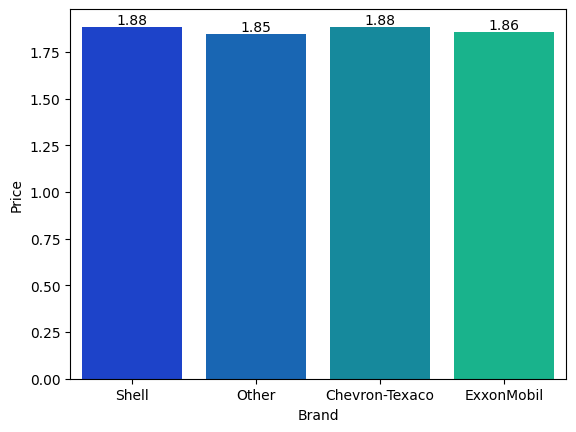

In [101]:
ax = sns.barplot(data= df,x= "Brand", y="Price", capsize=0.1, palette= 'winter', errorbar= None)
ax.bar_label(ax.containers[0], fmt='{:.3}')
plt.show

### Convert the variable Brand to a numerical variable using a dummy variable

In [23]:
df_brand = pd.get_dummies(df['Brand'], dtype=int)
df_brand = pd.concat([df, df_brand], axis = 1)
df_brand.drop(df_brand.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df_brand

,ID,Price,Chevron-Texaco,ExxonMobil,Other,Shell
0,1,1.79,0,0,0,1
1,2,1.83,0,0,1,0
2,3,1.88,0,0,1,0
3,4,1.88,1,0,0,0
4,5,1.84,0,0,0,1
...,...,...,...,...,...,...
96,97,1.77,0,0,1,0
97,98,1.99,1,0,0,0
98,99,1.99,0,0,0,1
99,100,1.99,0,0,1,0


### Create the model

In [24]:
lm_brand = LinearRegression()
lm_brand
X_brand = df_brand[['Chevron-Texaco', 'ExxonMobil', 'Other']]
Y_brand = df_brand['Price']
lm_brand.fit(X_brand,Y_brand)
Yhat_brand=lm_brand.predict(X_brand)

In [25]:
y_pred_brand = lm_brand.predict(X_brand)
y_pred_brand

array([1.8837931 , 1.84571429, 1.84571429, 1.884375  , 1.8837931 ,
       1.8837931 , 1.84571429, 1.84571429, 1.8837931 , 1.84571429,
       1.884375  , 1.84571429, 1.8837931 , 1.84571429, 1.8837931 ,
       1.8837931 , 1.8837931 , 1.84571429, 1.85642857, 1.84571429,
       1.84571429, 1.84571429, 1.84571429, 1.84571429, 1.84571429,
       1.85642857, 1.8837931 , 1.85642857, 1.85642857, 1.84571429,
       1.84571429, 1.8837931 , 1.84571429, 1.85642857, 1.84571429,
       1.884375  , 1.8837931 , 1.8837931 , 1.84571429, 1.8837931 ,
       1.884375  , 1.84571429, 1.8837931 , 1.84571429, 1.884375  ,
       1.84571429, 1.85642857, 1.8837931 , 1.84571429, 1.84571429,
       1.884375  , 1.84571429, 1.84571429, 1.85642857, 1.85642857,
       1.84571429, 1.8837931 , 1.884375  , 1.84571429, 1.84571429,
       1.884375  , 1.8837931 , 1.8837931 , 1.884375  , 1.85642857,
       1.8837931 , 1.884375  , 1.8837931 , 1.8837931 , 1.884375  ,
       1.8837931 , 1.84571429, 1.84571429, 1.8837931 , 1.85642

In [26]:
c_brand = lm_brand.intercept_
c_brand

1.883793103448276

In [27]:
m_brand = lm_brand.coef_
m_brand

array([ 0.0005819 , -0.02736453, -0.03807882])

In [28]:
brand_e = m_brand *X_brand.mean()/Y_brand.mean()
brand_e

Chevron-Texaco    0.000049
ExxonMobil       -0.002035
Other            -0.008494
dtype: float64

In [29]:
r2_brand = r2_score(Y_brand, y_pred_brand)
r2_brand

0.0494271111809671

### 4. Gas stations at stoplights charge more (faceted histogram).

<function matplotlib.pyplot.show(close=None, block=None)>

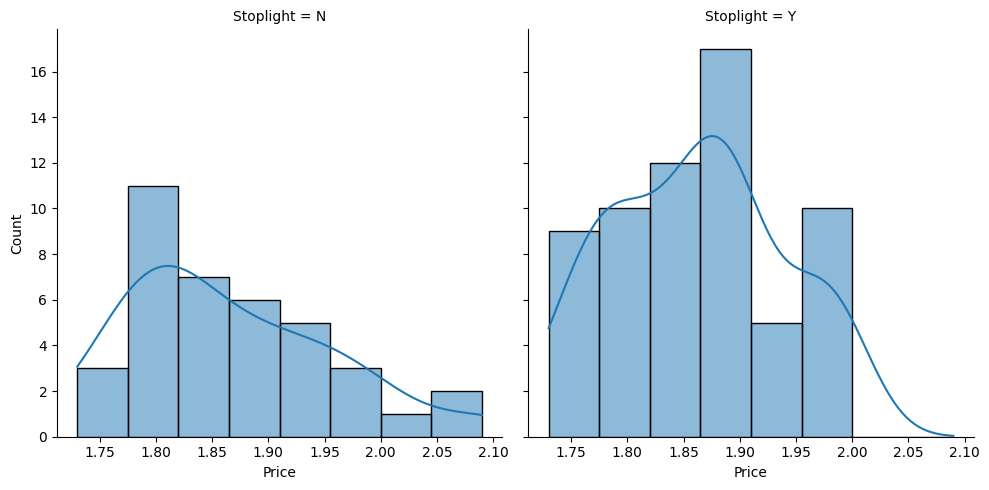

In [98]:
sns.displot(data= df, x="Price", col="Stoplight", facet_kws=dict(margin_titles=True), kde= True)
plt.show

### Convert the variable Stoplight to a numerical variable using a dummy variable

In [167]:
df_light = pd.get_dummies(df['Stoplight'], dtype=int)
df_light = pd.concat([df, df_light], axis = 1)
df_light.drop(df_light.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
df_light

,ID,Price,Y
0,1,1.79,0
1,2,1.83,0
2,3,1.88,1
3,4,1.88,1
4,5,1.84,1
...,...,...,...
96,97,1.77,1
97,98,1.99,1
98,99,1.99,1
99,100,1.99,1


### Create the model

In [112]:
lm_light = LinearRegression()
lm_light
X_light = df_light[['Y']]
Y_light = df_light['Price']
lm_light.fit(X_light,Y_light)
Yhat_light=lm_light.predict(X_light)

In [132]:
y_pred_light = lm_light.predict(X_light)
y_pred_light

array([1.86631579, 1.86631579, 1.86301587, 1.86301587, 1.86301587,
       1.86631579, 1.86631579, 1.86301587, 1.86631579, 1.86631579,
       1.86301587, 1.86301587, 1.86301587, 1.86301587, 1.86301587,
       1.86301587, 1.86301587, 1.86631579, 1.86301587, 1.86301587,
       1.86301587, 1.86301587, 1.86631579, 1.86631579, 1.86301587,
       1.86301587, 1.86301587, 1.86301587, 1.86301587, 1.86301587,
       1.86631579, 1.86631579, 1.86301587, 1.86301587, 1.86631579,
       1.86301587, 1.86301587, 1.86631579, 1.86301587, 1.86301587,
       1.86301587, 1.86631579, 1.86631579, 1.86301587, 1.86301587,
       1.86301587, 1.86301587, 1.86301587, 1.86301587, 1.86301587,
       1.86301587, 1.86301587, 1.86301587, 1.86631579, 1.86301587,
       1.86631579, 1.86301587, 1.86301587, 1.86631579, 1.86631579,
       1.86301587, 1.86301587, 1.86301587, 1.86301587, 1.86301587,
       1.86631579, 1.86301587, 1.86631579, 1.86301587, 1.86631579,
       1.86631579, 1.86301587, 1.86301587, 1.86631579, 1.86631

In [113]:
c_light = lm_light.intercept_
c_light

1.8663157894736844

In [114]:
m_light = lm_light.coef_
m_light

array([-0.00329992])

In [115]:
light_e = m_light *X_light.mean()/Y_light.mean()
light_e

Y   -0.001104
dtype: float64

In [133]:
r2_light = r2_score(Y_light, y_pred_light)
r2_light

0.00038844875858223826

### 5. Gas stations with direct highway access charge more (your choice of plot). 

<function matplotlib.pyplot.show(close=None, block=None)>

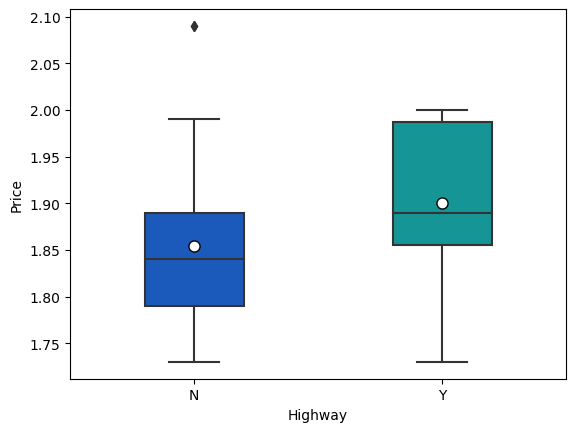

In [116]:
sns.boxplot(x= "Highway", y= "Price", data= df, width=0.4, showmeans=True, meanprops= {"marker":"o"
                                                                                          , "markerfacecolor":"white"
                                                                                          , "markersize": "8"
                                                                                          , "markeredgecolor": "black"}
            ,palette= "winter")
plt.show

### Convert the variable Highway to a numerical variable using a dummy variable

In [168]:
df_highway = pd.get_dummies(df['Highway'], dtype=int)
df_highway = pd.concat([df, df_highway], axis = 1)
df_highway.drop(df_highway.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
df_highway

,ID,Price,Y
0,1,1.79,0
1,2,1.83,0
2,3,1.88,0
3,4,1.88,0
4,5,1.84,0
...,...,...,...
96,97,1.77,0
97,98,1.99,1
98,99,1.99,1
99,100,1.99,1


### Create the model

In [119]:
lm_highway = LinearRegression()
lm_highway
X_highway = df_highway[['Y']]
Y_highway = df_highway['Price']
lm_highway.fit(X_highway,Y_highway)
Yhat_highway=lm_highway.predict(X_highway)

In [134]:
y_pred_highway = lm_highway.predict(X_highway)
y_pred_highway

array([1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.9      , 1.9      , 1.9      , 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.9      , 1.8543038, 1.9      ,
       1.9      , 1.9      , 1.9      , 1.9      , 1.9      , 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.9      , 1.8543038, 1.8543038,
       1.9      , 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.9      , 1.9      , 1.8543038, 1.9      ,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.9      , 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038, 1.8543038,
       1.8543038, 1.8543038, 1.8543038, 1.8543038, 

In [120]:
c_highway = lm_highway.intercept_
c_highway

1.8543037974683545

In [121]:
m_highway = lm_highway.coef_
m_highway

array([0.0456962])

In [122]:
highway_e = m_highway *X_highway.mean()/Y_light.mean()
highway_e

Y    0.005339
dtype: float64

In [135]:
r2_highway = r2_score(Y_highway, y_pred_highway)
r2_highway

0.054077137491742255

### Combine all theories in one model

In [48]:
df_model = pd.get_dummies(df['Highway'], dtype=int)
df_model.rename(columns={'Y': 'HighwayY'}, inplace=True)
df_model2 = pd.get_dummies(df['Stoplight'], dtype=int)
df_model2.rename(columns={'Y': 'LightY'}, inplace=True)
df_model3 = pd.concat([df_model, df_model2], axis = 1)
df_model4 = pd.get_dummies(df['Brand'], dtype=int)
df_model5 = pd.concat([df_model3, df_model4], axis = 1)
df_model6 = pd.get_dummies(df['Competitors'], dtype=int)
df_model6.rename(columns={'Y': 'CompY'}, inplace=True)
df_model7 = pd.concat([df_model6, df_model5], axis = 1)
df_model8 =pd.concat([df, df_model7], axis = 1)
df_model = df_model8
df_model

,Unnamed: 0,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,...,N,CompY,N,HighwayY,N,LightY,Chevron-Texaco,ExxonMobil,Other,Shell
0,1,1,Shell,1.79,4,Y,N,N,N,Y,...,1,0,1,0,1,0,0,0,0,1
1,2,2,Valero,1.83,4,Y,N,N,N,Y,...,1,0,1,0,1,0,0,0,1,0
2,3,3,7-Eleven,1.88,4,Y,N,N,N,Y,...,0,1,1,0,0,1,0,0,1,0
3,4,4,Texaco,1.88,4,Y,N,Y,N,Y,...,0,1,1,0,0,1,1,0,0,0
4,5,5,Shell,1.84,6,Y,N,N,N,Y,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,97,Valero,1.77,8,Y,N,Y,N,Y,...,1,0,1,0,0,1,0,0,1,0
97,98,98,Texaco,1.99,8,Y,N,N,Y,Y,...,0,1,0,1,0,1,1,0,0,0
98,99,99,Shell,1.99,6,Y,Y,N,Y,Y,...,0,1,0,1,0,1,0,0,0,1
99,100,100,Valero,1.99,8,Y,N,N,Y,Y,...,0,1,0,1,0,1,0,0,1,0


In [53]:
df_model['Income'] = df_model['Income']/10000
df_model['Income']

0      1.2786
1      1.2786
2      4.1279
3      4.1279
4      4.1279
        ...  
96     7.0095
97     4.4476
98     4.4476
99     4.4476
100    8.1903
Name: Income, Length: 101, dtype: float64

In [54]:
lm_model = LinearRegression()
lm_model
X_model = df_model[['Chevron-Texaco', 'ExxonMobil', 'Other', 'HighwayY', 'LightY', 'CompY', 'Income']]
Y_model = df_model['Price']
lm_model.fit(X_model,Y_model)
Yhat_model=lm_model.predict(X_model)

In [55]:
y_pred_model = lm_model.predict(X_model)
y_pred_model

array([1.82759743, 1.81282033, 1.82512395, 1.84200926, 1.85874391,
       1.83369111, 1.81891401, 1.84003228, 1.85253397, 1.84169138,
       1.83198106, 1.81509575, 1.82987286, 1.8906045 , 1.85510729,
       1.85332382, 1.85332382, 1.82420225, 1.82332059, 1.83854671,
       1.83854671, 1.82148733, 1.81921191, 1.8370496 , 1.84033019,
       1.85561997, 1.87355416, 1.88045834, 1.84216345, 1.84532053,
       1.82420225, 1.83897936, 1.82647768, 1.86026176, 1.85511415,
       1.89372691, 1.87819595, 1.92255822, 1.91005654, 1.92483364,
       1.87666753, 1.81921191, 1.83398901, 1.84033019, 1.83178842,
       1.81490311, 1.83058888, 1.84852307, 1.81490311, 1.81490311,
       1.87202543, 1.86665826, 1.82836337, 1.84177372, 1.88234403,
       1.84268528, 1.85973781, 1.86184601, 1.84268528, 1.84268528,
       1.86184601, 1.88151306, 1.91673662, 1.91884482, 1.87935039,
       1.98319839, 1.94928713, 1.9449035 , 1.94717893, 1.94701171,
       1.98319839, 1.83629726, 1.83629726, 1.8676418 , 1.83086

In [56]:
c_model = lm_model.intercept_
c_model

1.8146417865674118

In [57]:
m_model = lm_model.coef_
m_model

array([ 0.0021082 , -0.01793419, -0.01477711,  0.03829489,  0.00227542,
       -0.01884286,  0.01013268])

In [37]:
model_e = m_model *X_model.mean()/Y_model.mean()
model_e

Chevron-Texaco    0.000179
ExxonMobil       -0.001333
Other            -0.003296
HighwayY          0.004474
LightY            0.000761
CompY            -0.005004
Income            0.030833
dtype: float64

In [38]:
r2_model = r2_score(Y_model, y_pred_model)
r2_model

0.21054817202119824